In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import numpy
import torch.utils.data
from sklearn.model_selection import train_test_split

# Display Dataset

In [2]:
import sys
sys.path.append('..')

from Datasets.MackeyGlassDataset import MackeyGlassDataset
Mglass1 = MackeyGlassDataset(1000, 5, tau=10, seed=0)

([<matplotlib.lines.Line2D at 0x1b1275b34d0>], (4995, 1))

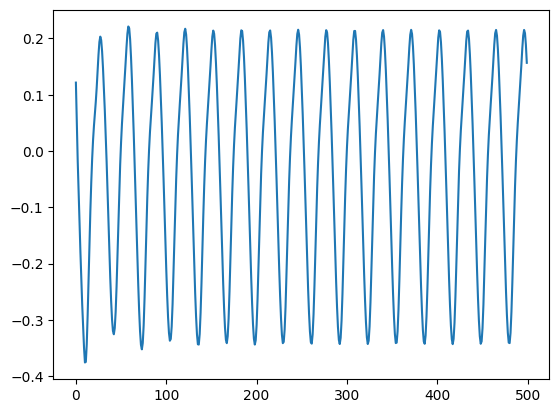

In [3]:
dataset = torch.utils.data.DataLoader(Mglass1, batch_size=1, shuffle=False)
dataset = np.array([data[0] for data in dataset]).reshape(-1, 1)
# loop through the input data (data[0]) and convert it to numpy array with shape of colomn vector

plt.plot(dataset[:500]), dataset.shape

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('CPU is available')


GPU is available


# ESN 

In [5]:
from Models.Echostate import ESN

esn = ESN(input_dim = 1, reservoir_dim = 500, output_dim = 1,
           spectral_radius=0.9)

esn.to(device)
esn.freeze_reservoir()  # Freeze reservoir weights

# Define optimizer and criterion for the readout layer
optimizer = torch.optim.Adam(esn.readout.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [6]:
inputs, targets = Mglass1[0]
inputs = (inputs - torch.mean(inputs)) / torch.std(inputs)
targets = (targets - torch.mean(targets)) / torch.std(targets)

inputs = inputs.to(device) 
targets = targets.to(device)

print(f"Model is on: {next(esn.parameters()).device}")
print(f"Inputs are on: {inputs.device}")
print(f"Targets are on: {targets.device}")

Model is on: cuda:0
Inputs are on: cuda:0
Targets are on: cuda:0


In [7]:
losses = esn.Train(inputs, targets, epochs=100, lr=0.01, print_every=10)

Epoch 0, Loss: 0.9963604807853699
Epoch 10, Loss: 0.03129846975207329
Epoch 20, Loss: 0.030377114191651344
Epoch 30, Loss: 0.015615751035511494
Epoch 40, Loss: 0.008724702522158623
Epoch 50, Loss: 0.0037935813888907433
Epoch 60, Loss: 0.001586344325914979
Epoch 70, Loss: 0.0014734289143234491
Epoch 80, Loss: 0.0010685267625376582
Epoch 90, Loss: 0.000902124447748065
Epoch 99, Loss: 0.0008186252089217305


device(type='cuda', index=0)

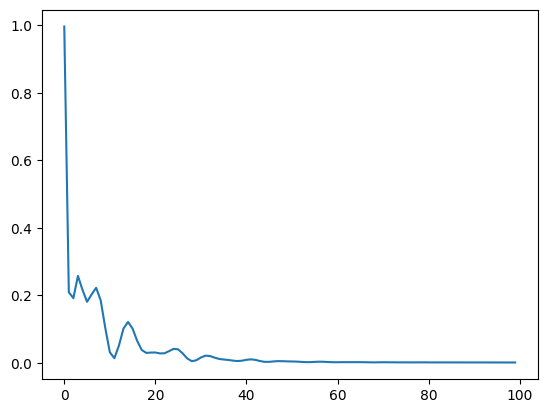

In [12]:
plt.plot(losses.cpu().detach().numpy())
inputs.device

In [13]:
steps = 50
predictions = esn.Predict(inputs, steps = steps).cpu().detach().numpy()

In [14]:
inputs_plot = inputs[-500:].cpu().detach().numpy()
targets_plot = targets[-500:].cpu().detach().numpy()

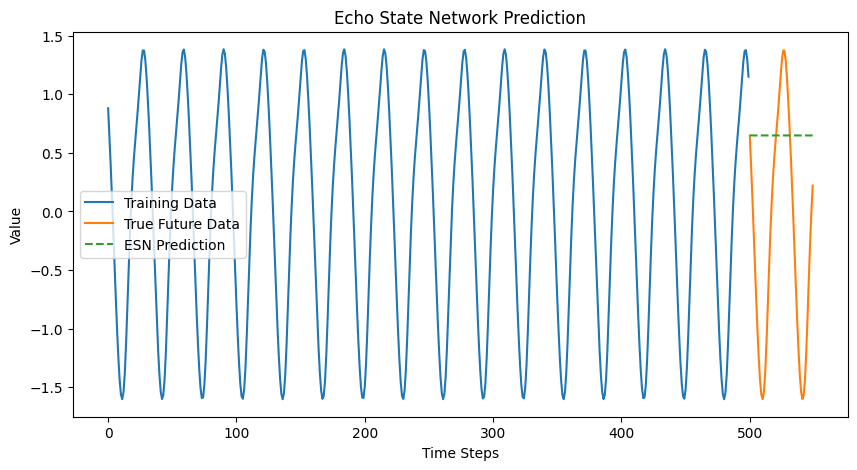

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(inputs_plot)), inputs_plot, label="Training Data")
plt.plot(range(len(inputs_plot), len(targets_plot) + steps), targets_plot[:steps], label="True Future Data")
plt.plot(range(len(inputs_plot), len(targets_plot) + steps), predictions, '--', label="ESN Prediction")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Echo State Network Prediction")
plt.show()